## Imports

In [1]:
import sys 
import numpy as np 
import matplotlib.pyplot as plt


import torch
import torchvision 
import torch.optim as optim
import torch.nn as nn

sys.path.insert(0, '../../Utils')

import models
from train import *
from metrics import *  

print("Python: %s" % sys.version)
print("Pytorch: %s" % torch.__version__)

Python: 3.6.5 (default, Jun 21 2018, 23:07:39) 
[GCC 5.4.0 20160609]
Pytorch: 0.4.0


## Hyperparameters

In [2]:
n_epochs = 30
batch_size = 128
lr = 0.0001

## Load CIFAR100

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


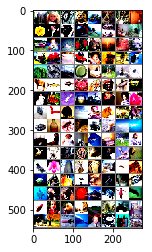

In [3]:
# define series of transforms to pre process images 
transform = torchvision.transforms.Compose([
    #torchvision.transforms.Pad(2),
    torchvision.transforms.ToTensor(),
    #torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    torchvision.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])
    

classes = None


# load training set 
trainset = torchvision.datasets.CIFAR100('../../Datasets/', train=True, transform=transform, download=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

# load test set 
testset = torchvision.datasets.CIFAR100('../../Datasets/', train=False, transform=transform, download=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

# helper function to unnormalize and plot image 
def imshow(img):
    img = np.array(img)
    img = img / 2 + 0.5
    img = np.moveaxis(img, 0, -1)
    plt.imshow(img)
    
# display sample from dataset 
imgs,labels = iter(trainloader).next()
imshow(torchvision.utils.make_grid(imgs))  

## Model Architecture

In [4]:
# determine device to run network on (runs on gpu if available)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


multi_layer_perceptron = models.cnn(3, 100, 64)


# load the torchvision resnet18 implementation 
resnet18 = torchvision.models.resnet18(num_classes=100)
# resnet fix for cifar10 image size 
resnet18.avgpool = nn.AvgPool2d(2, stride=1)

#alexnet = torchvision.models.alexnet()


vgg16 = torchvision.models.vgg16(num_classes=100)
# vgg16 fix for cifar10 image size 
vgg16.classifier = nn.Sequential(
            nn.Linear(512, 64),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(64, 64),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(64, 100),
        )
#squeezenet = torchvision.models.squeezenet1_0()
#densenet = torchvision.models.densenet161()
#inception = torchvision.models.inception_v3(num_classes=10)

#net = resnet18.to(device)
net = vgg16.to(device)
net.apply(models.weights_init)

criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr=lr)

## Training 

In [ ]:
train(net, trainloader, testloader, optimizer, criterion, n_epochs, classes=classes, verbose=True)


[0/30][0/391] loss = 4.600455
[0/30][1/391] loss = 4.636512
[0/30][2/391] loss = 4.630597
[0/30][3/391] loss = 4.628911
[0/30][4/391] loss = 4.593707
[0/30][5/391] loss = 4.618916
[0/30][6/391] loss = 4.610795
[0/30][7/391] loss = 4.605339
[0/30][8/391] loss = 4.616000
[0/30][9/391] loss = 4.617167
[0/30][10/391] loss = 4.613059
[0/30][11/391] loss = 4.601267
[0/30][12/391] loss = 4.602640
[0/30][13/391] loss = 4.600862
[0/30][14/391] loss = 4.608124
[0/30][15/391] loss = 4.607554
[0/30][16/391] loss = 4.612336
[0/30][17/391] loss = 4.603601
[0/30][18/391] loss = 4.610256
[0/30][19/391] loss = 4.614306
[0/30][20/391] loss = 4.605296
[0/30][21/391] loss = 4.605831
[0/30][22/391] loss = 4.610898
[0/30][23/391] loss = 4.614163
[0/30][24/391] loss = 4.602965
[0/30][25/391] loss = 4.608357
[0/30][26/391] loss = 4.623757
[0/30][27/391] loss = 4.618979
[0/30][28/391] loss = 4.612924
[0/30][29/391] loss = 4.610810
[0/30][30/391] loss = 4.609361
[0/30][31/391] loss = 4.609399
[0/30][32/391] los

[0/30][261/391] loss = 4.608163
[0/30][262/391] loss = 4.605223
[0/30][263/391] loss = 4.616846
[0/30][264/391] loss = 4.609557
[0/30][265/391] loss = 4.617325
[0/30][266/391] loss = 4.607515
[0/30][267/391] loss = 4.610226
[0/30][268/391] loss = 4.619784
[0/30][269/391] loss = 4.598152
[0/30][270/391] loss = 4.596984
[0/30][271/391] loss = 4.603185
[0/30][272/391] loss = 4.611834
[0/30][273/391] loss = 4.612331
[0/30][274/391] loss = 4.610373
[0/30][275/391] loss = 4.608022
[0/30][276/391] loss = 4.607406
[0/30][277/391] loss = 4.595318
[0/30][278/391] loss = 4.615378
[0/30][279/391] loss = 4.606360
[0/30][280/391] loss = 4.604208
[0/30][281/391] loss = 4.613619
[0/30][282/391] loss = 4.601055
[0/30][283/391] loss = 4.604005
[0/30][284/391] loss = 4.611594
[0/30][285/391] loss = 4.616563
[0/30][286/391] loss = 4.618801
[0/30][287/391] loss = 4.608403
[0/30][288/391] loss = 4.593882
[0/30][289/391] loss = 4.605938
[0/30][290/391] loss = 4.607906
[0/30][291/391] loss = 4.615584
[0/30][2

[1/30][129/391] loss = 4.626453
[1/30][130/391] loss = 4.605203
[1/30][131/391] loss = 4.607805
[1/30][132/391] loss = 4.615119
[1/30][133/391] loss = 4.593134
[1/30][134/391] loss = 4.599393
[1/30][135/391] loss = 4.601472
[1/30][136/391] loss = 4.597600
[1/30][137/391] loss = 4.618096
[1/30][138/391] loss = 4.609285
[1/30][139/391] loss = 4.604338
[1/30][140/391] loss = 4.622533
[1/30][141/391] loss = 4.608146
[1/30][142/391] loss = 4.621813
[1/30][143/391] loss = 4.603182
[1/30][144/391] loss = 4.589449
[1/30][145/391] loss = 4.603037
[1/30][146/391] loss = 4.601248
[1/30][147/391] loss = 4.584754
[1/30][148/391] loss = 4.581839
[1/30][149/391] loss = 4.584531
[1/30][150/391] loss = 4.591327
[1/30][151/391] loss = 4.591343
[1/30][152/391] loss = 4.589504
[1/30][153/391] loss = 4.588305
[1/30][154/391] loss = 4.593394
[1/30][155/391] loss = 4.615336
[1/30][156/391] loss = 4.611074
[1/30][157/391] loss = 4.604103
[1/30][158/391] loss = 4.595802
[1/30][159/391] loss = 4.592656
[1/30][1

[1/30][387/391] loss = 4.552265
[1/30][388/391] loss = 4.550875
[1/30][389/391] loss = 4.575307
[1/30][390/391] loss = 4.499879
[1/30]

Total accuracy = 2.68 %


[2/30][0/391] loss = 4.546636
[2/30][1/391] loss = 4.571739
[2/30][2/391] loss = 4.552428
[2/30][3/391] loss = 4.581004
[2/30][4/391] loss = 4.568886
[2/30][5/391] loss = 4.551839
[2/30][6/391] loss = 4.556418
[2/30][7/391] loss = 4.506851
[2/30][8/391] loss = 4.584720
[2/30][9/391] loss = 4.569849
[2/30][10/391] loss = 4.527352
[2/30][11/391] loss = 4.586503
[2/30][12/391] loss = 4.545578
[2/30][13/391] loss = 4.535474
[2/30][14/391] loss = 4.548786
[2/30][15/391] loss = 4.567295
[2/30][16/391] loss = 4.552618
[2/30][17/391] loss = 4.486715
[2/30][18/391] loss = 4.601787
[2/30][19/391] loss = 4.547251
[2/30][20/391] loss = 4.558094
[2/30][21/391] loss = 4.580460
[2/30][22/391] loss = 4.547211
[2/30][23/391] loss = 4.549103
[2/30][24/391] loss = 4.530524
[2/30][25/391] loss = 4.505660
[2/30][26/391] loss = 4.587643
[2/30][27/3

[2/30][255/391] loss = 4.539873
[2/30][256/391] loss = 4.535838
[2/30][257/391] loss = 4.474767
[2/30][258/391] loss = 4.531507
[2/30][259/391] loss = 4.487206
[2/30][260/391] loss = 4.502266
[2/30][261/391] loss = 4.481882
[2/30][262/391] loss = 4.549493
[2/30][263/391] loss = 4.505972
[2/30][264/391] loss = 4.476148
[2/30][265/391] loss = 4.477574
[2/30][266/391] loss = 4.559516
[2/30][267/391] loss = 4.469330
[2/30][268/391] loss = 4.487006
[2/30][269/391] loss = 4.488176
[2/30][270/391] loss = 4.435880
[2/30][271/391] loss = 4.522375
[2/30][272/391] loss = 4.410667
[2/30][273/391] loss = 4.488966
[2/30][274/391] loss = 4.612947
[2/30][275/391] loss = 4.486572
[2/30][276/391] loss = 4.483344
[2/30][277/391] loss = 4.481905
[2/30][278/391] loss = 4.528053
[2/30][279/391] loss = 4.506998
[2/30][280/391] loss = 4.505444
[2/30][281/391] loss = 4.498500
[2/30][282/391] loss = 4.510036
[2/30][283/391] loss = 4.451785
[2/30][284/391] loss = 4.548890
[2/30][285/391] loss = 4.460714
[2/30][2

[3/30][123/391] loss = 4.463403
[3/30][124/391] loss = 4.421432
[3/30][125/391] loss = 4.461441
[3/30][126/391] loss = 4.435509
[3/30][127/391] loss = 4.489755
[3/30][128/391] loss = 4.450886
[3/30][129/391] loss = 4.436623
[3/30][130/391] loss = 4.428019
[3/30][131/391] loss = 4.475983
[3/30][132/391] loss = 4.491024
[3/30][133/391] loss = 4.555885
[3/30][134/391] loss = 4.391787
[3/30][135/391] loss = 4.467692
[3/30][136/391] loss = 4.353424
[3/30][137/391] loss = 4.452197
[3/30][138/391] loss = 4.428587
[3/30][139/391] loss = 4.477658
[3/30][140/391] loss = 4.422510
[3/30][141/391] loss = 4.518390
[3/30][142/391] loss = 4.447005
[3/30][143/391] loss = 4.531764
[3/30][144/391] loss = 4.435880
[3/30][145/391] loss = 4.379459
[3/30][146/391] loss = 4.350705
[3/30][147/391] loss = 4.410154
[3/30][148/391] loss = 4.550690
[3/30][149/391] loss = 4.444971
[3/30][150/391] loss = 4.496435
[3/30][151/391] loss = 4.483877
[3/30][152/391] loss = 4.479622
[3/30][153/391] loss = 4.393463
[3/30][1

[3/30][381/391] loss = 4.449684
[3/30][382/391] loss = 4.399328
[3/30][383/391] loss = 4.489128
[3/30][384/391] loss = 4.339617
[3/30][385/391] loss = 4.399936
[3/30][386/391] loss = 4.568205
[3/30][387/391] loss = 4.424345
[3/30][388/391] loss = 4.390461
[3/30][389/391] loss = 4.448113
[3/30][390/391] loss = 4.457741
[3/30]

Total accuracy = 3.58 %


[4/30][0/391] loss = 4.466186
[4/30][1/391] loss = 4.495822
[4/30][2/391] loss = 4.485253
[4/30][3/391] loss = 4.417841
[4/30][4/391] loss = 4.423661
[4/30][5/391] loss = 4.396259
[4/30][6/391] loss = 4.338386
[4/30][7/391] loss = 4.297531
[4/30][8/391] loss = 4.471828
[4/30][9/391] loss = 4.414475
[4/30][10/391] loss = 4.386704
[4/30][11/391] loss = 4.454601
[4/30][12/391] loss = 4.398448
[4/30][13/391] loss = 4.541279
[4/30][14/391] loss = 4.406785
[4/30][15/391] loss = 4.427866
[4/30][16/391] loss = 4.523612
[4/30][17/391] loss = 4.447892
[4/30][18/391] loss = 4.389071
[4/30][19/391] loss = 4.450724
[4/30][20/391] loss = 4.431077
[4/30

[4/30][249/391] loss = 4.416970
[4/30][250/391] loss = 4.415130
[4/30][251/391] loss = 4.486141
[4/30][252/391] loss = 4.462503
[4/30][253/391] loss = 4.327371
[4/30][254/391] loss = 4.385895
[4/30][255/391] loss = 4.324396
[4/30][256/391] loss = 4.436174
[4/30][257/391] loss = 4.402275
[4/30][258/391] loss = 4.417452
[4/30][259/391] loss = 4.438488
[4/30][260/391] loss = 4.424506
[4/30][261/391] loss = 4.350879
[4/30][262/391] loss = 4.440841
[4/30][263/391] loss = 4.422205
[4/30][264/391] loss = 4.345679
[4/30][265/391] loss = 4.479173
[4/30][266/391] loss = 4.486726
[4/30][267/391] loss = 4.450515
[4/30][268/391] loss = 4.364668
[4/30][269/391] loss = 4.282910
[4/30][270/391] loss = 4.430502
[4/30][271/391] loss = 4.352937
[4/30][272/391] loss = 4.424846
[4/30][273/391] loss = 4.392988
[4/30][274/391] loss = 4.369047
[4/30][275/391] loss = 4.378355
[4/30][276/391] loss = 4.329636
[4/30][277/391] loss = 4.404279
[4/30][278/391] loss = 4.349070
[4/30][279/391] loss = 4.366433
[4/30][2

[5/30][117/391] loss = 4.348464
[5/30][118/391] loss = 4.241399
[5/30][119/391] loss = 4.373309
[5/30][120/391] loss = 4.218354
[5/30][121/391] loss = 4.315811
[5/30][122/391] loss = 4.327745
[5/30][123/391] loss = 4.368650
[5/30][124/391] loss = 4.492493
[5/30][125/391] loss = 4.274105
[5/30][126/391] loss = 4.144737
[5/30][127/391] loss = 4.341427
[5/30][128/391] loss = 4.362708
[5/30][129/391] loss = 4.282140
[5/30][130/391] loss = 4.275541
[5/30][131/391] loss = 4.250288
[5/30][132/391] loss = 4.353039
[5/30][133/391] loss = 4.450256
[5/30][134/391] loss = 4.412112
[5/30][135/391] loss = 4.337460
[5/30][136/391] loss = 4.299629
[5/30][137/391] loss = 4.450089
[5/30][138/391] loss = 4.442719
[5/30][139/391] loss = 4.371624
[5/30][140/391] loss = 4.286291
[5/30][141/391] loss = 4.335977
[5/30][142/391] loss = 4.424481
[5/30][143/391] loss = 4.346251
[5/30][144/391] loss = 4.357855
[5/30][145/391] loss = 4.151255
[5/30][146/391] loss = 4.189468
[5/30][147/391] loss = 4.419683
[5/30][1

[5/30][375/391] loss = 4.412511
[5/30][376/391] loss = 4.303133
[5/30][377/391] loss = 4.394173
[5/30][378/391] loss = 4.454865
[5/30][379/391] loss = 4.331768
[5/30][380/391] loss = 4.337992
[5/30][381/391] loss = 4.262409
[5/30][382/391] loss = 4.316819
[5/30][383/391] loss = 4.279809
[5/30][384/391] loss = 4.341835
[5/30][385/391] loss = 4.377852
[5/30][386/391] loss = 4.168871
[5/30][387/391] loss = 4.304738
[5/30][388/391] loss = 4.391304
[5/30][389/391] loss = 4.326090
[5/30][390/391] loss = 4.129092
[5/30]

Total accuracy = 4.58 %


[6/30][0/391] loss = 4.178069
[6/30][1/391] loss = 4.145384
[6/30][2/391] loss = 4.301647
[6/30][3/391] loss = 4.341168
[6/30][4/391] loss = 4.441800
[6/30][5/391] loss = 4.424483
[6/30][6/391] loss = 4.127938
[6/30][7/391] loss = 4.394218
[6/30][8/391] loss = 4.273234
[6/30][9/391] loss = 4.336607
[6/30][10/391] loss = 4.311802
[6/30][11/391] loss = 4.300360
[6/30][12/391] loss = 4.337347
[6/30][13/391] loss = 4.383925
[6/30][14/391] loss = 4.281078

[6/30][243/391] loss = 4.259737
[6/30][244/391] loss = 4.193883
[6/30][245/391] loss = 4.356688
[6/30][246/391] loss = 4.235844
[6/30][247/391] loss = 4.348879
[6/30][248/391] loss = 4.325678
[6/30][249/391] loss = 4.367063
[6/30][250/391] loss = 4.377267
[6/30][251/391] loss = 4.254942
[6/30][252/391] loss = 4.220068
[6/30][253/391] loss = 4.262271
[6/30][254/391] loss = 4.185061
[6/30][255/391] loss = 4.475198
[6/30][256/391] loss = 4.196159
[6/30][257/391] loss = 4.282247
[6/30][258/391] loss = 4.278085
[6/30][259/391] loss = 4.330340
[6/30][260/391] loss = 4.249815
[6/30][261/391] loss = 4.361198
[6/30][262/391] loss = 4.247992
[6/30][263/391] loss = 4.265888
[6/30][264/391] loss = 4.142940
[6/30][265/391] loss = 4.254409
[6/30][266/391] loss = 4.222097
[6/30][267/391] loss = 4.133691
[6/30][268/391] loss = 4.341325
[6/30][269/391] loss = 4.137143
[6/30][270/391] loss = 4.308286
[6/30][271/391] loss = 4.328463
[6/30][272/391] loss = 4.263113
[6/30][273/391] loss = 4.312210
[6/30][2

[7/30][111/391] loss = 4.184186
[7/30][112/391] loss = 4.163723
[7/30][113/391] loss = 4.235541
[7/30][114/391] loss = 4.139471
[7/30][115/391] loss = 4.143909
[7/30][116/391] loss = 4.113490
[7/30][117/391] loss = 4.293260
[7/30][118/391] loss = 4.290834
[7/30][119/391] loss = 4.230469
[7/30][120/391] loss = 4.129102
[7/30][121/391] loss = 4.057999
[7/30][122/391] loss = 4.166585
[7/30][123/391] loss = 4.128158
[7/30][124/391] loss = 4.333963
[7/30][125/391] loss = 4.241498
[7/30][126/391] loss = 4.294033
[7/30][127/391] loss = 4.283138
[7/30][128/391] loss = 4.186535
[7/30][129/391] loss = 4.162549
[7/30][130/391] loss = 4.219109
[7/30][131/391] loss = 4.228857
[7/30][132/391] loss = 4.285870
[7/30][133/391] loss = 4.273841
[7/30][134/391] loss = 4.317216
[7/30][135/391] loss = 4.224533
[7/30][136/391] loss = 4.148486
[7/30][137/391] loss = 4.262353
[7/30][138/391] loss = 4.183740
[7/30][139/391] loss = 4.066727
[7/30][140/391] loss = 4.139127
[7/30][141/391] loss = 4.257190
[7/30][1

[7/30][368/391] loss = 4.099807
[7/30][369/391] loss = 4.201971
[7/30][370/391] loss = 4.280275
[7/30][371/391] loss = 3.984680
[7/30][372/391] loss = 4.189048
[7/30][373/391] loss = 4.269994
[7/30][374/391] loss = 4.442276
[7/30][375/391] loss = 4.281510
[7/30][376/391] loss = 4.191091
[7/30][377/391] loss = 4.211713
[7/30][378/391] loss = 4.043425
[7/30][379/391] loss = 4.263534
[7/30][380/391] loss = 4.181198
[7/30][381/391] loss = 4.215858
[7/30][382/391] loss = 4.140865
[7/30][383/391] loss = 4.186294
[7/30][384/391] loss = 4.166795
[7/30][385/391] loss = 4.316047
[7/30][386/391] loss = 4.153469
[7/30][387/391] loss = 4.184858
[7/30][388/391] loss = 4.196093
[7/30][389/391] loss = 4.163837
[7/30][390/391] loss = 4.125762
[7/30]

Total accuracy = 6.46 %


[8/30][0/391] loss = 4.208149
[8/30][1/391] loss = 4.177526
[8/30][2/391] loss = 4.132080
[8/30][3/391] loss = 4.214180
[8/30][4/391] loss = 4.124825
[8/30][5/391] loss = 4.330724
[8/30][6/391] loss = 4.187874
[8/30][7/391] loss =

[8/30][237/391] loss = 4.074780
[8/30][238/391] loss = 4.063402
[8/30][239/391] loss = 4.144381
[8/30][240/391] loss = 4.213472
[8/30][241/391] loss = 4.131058
[8/30][242/391] loss = 4.170526
[8/30][243/391] loss = 4.159074
[8/30][244/391] loss = 4.096930
[8/30][245/391] loss = 4.167646
[8/30][246/391] loss = 4.085531
[8/30][247/391] loss = 4.215907
[8/30][248/391] loss = 3.995798
[8/30][249/391] loss = 4.088131
[8/30][250/391] loss = 4.112647
[8/30][251/391] loss = 4.072881
[8/30][252/391] loss = 4.184148
[8/30][253/391] loss = 4.108183
[8/30][254/391] loss = 4.183792
[8/30][255/391] loss = 4.105570
[8/30][256/391] loss = 4.216052
[8/30][257/391] loss = 4.147305
[8/30][258/391] loss = 4.216043
[8/30][259/391] loss = 4.105741
[8/30][260/391] loss = 4.140969
[8/30][261/391] loss = 4.136101
[8/30][262/391] loss = 4.071451
[8/30][263/391] loss = 4.239087
[8/30][264/391] loss = 4.163151
[8/30][265/391] loss = 4.009103
[8/30][266/391] loss = 4.260294
[8/30][267/391] loss = 4.145481
[8/30][2

[9/30][105/391] loss = 4.039155
[9/30][106/391] loss = 4.065632
[9/30][107/391] loss = 3.942576
[9/30][108/391] loss = 3.968903
[9/30][109/391] loss = 4.129127
[9/30][110/391] loss = 4.065767
[9/30][111/391] loss = 4.181490
[9/30][112/391] loss = 4.013150
[9/30][113/391] loss = 4.060380
[9/30][114/391] loss = 3.918366
[9/30][115/391] loss = 4.073221
[9/30][116/391] loss = 3.947315
[9/30][117/391] loss = 3.847512
[9/30][118/391] loss = 4.170530
[9/30][119/391] loss = 4.199497
[9/30][120/391] loss = 3.960318
[9/30][121/391] loss = 4.099607
[9/30][122/391] loss = 3.937576
[9/30][123/391] loss = 3.943773
[9/30][124/391] loss = 4.170883
[9/30][125/391] loss = 4.228570
[9/30][126/391] loss = 4.078881
[9/30][127/391] loss = 4.124313
[9/30][128/391] loss = 3.926692
[9/30][129/391] loss = 4.158860
[9/30][130/391] loss = 4.081950
[9/30][131/391] loss = 4.155282
[9/30][132/391] loss = 4.089299
[9/30][133/391] loss = 4.112015
[9/30][134/391] loss = 4.050965
[9/30][135/391] loss = 3.933172
[9/30][1

[9/30][363/391] loss = 3.987649
[9/30][364/391] loss = 4.098062
[9/30][365/391] loss = 4.080499
[9/30][366/391] loss = 3.946281
[9/30][367/391] loss = 3.882792
[9/30][368/391] loss = 4.141519
[9/30][369/391] loss = 4.179206
[9/30][370/391] loss = 4.112714
[9/30][371/391] loss = 4.089993
[9/30][372/391] loss = 4.192719
[9/30][373/391] loss = 4.066384
[9/30][374/391] loss = 3.982404
[9/30][375/391] loss = 4.115278
[9/30][376/391] loss = 4.087044
[9/30][377/391] loss = 3.928893
[9/30][378/391] loss = 3.988925
[9/30][379/391] loss = 4.044689
[9/30][380/391] loss = 3.962135
[9/30][381/391] loss = 3.932510
[9/30][382/391] loss = 3.896974
[9/30][383/391] loss = 4.033307
[9/30][384/391] loss = 4.046843
[9/30][385/391] loss = 3.990014
[9/30][386/391] loss = 3.976623
[9/30][387/391] loss = 4.030441
[9/30][388/391] loss = 4.182798
[9/30][389/391] loss = 3.914768
[9/30][390/391] loss = 4.112745
[9/30]

Total accuracy = 8.74 %


[10/30][0/391] loss = 3.874238
[10/30][1/391] loss = 3.925209
[10/30][

[10/30][225/391] loss = 4.135956
[10/30][226/391] loss = 4.150346
[10/30][227/391] loss = 3.943173
[10/30][228/391] loss = 4.017008
[10/30][229/391] loss = 4.109232
[10/30][230/391] loss = 3.925625
[10/30][231/391] loss = 3.967874
[10/30][232/391] loss = 4.065887
[10/30][233/391] loss = 3.872745
[10/30][234/391] loss = 3.865348
[10/30][235/391] loss = 3.981866
[10/30][236/391] loss = 4.130620
[10/30][237/391] loss = 4.001404
[10/30][238/391] loss = 4.099645
[10/30][239/391] loss = 3.949743
[10/30][240/391] loss = 3.997974
[10/30][241/391] loss = 4.028296
[10/30][242/391] loss = 3.894495
[10/30][243/391] loss = 3.888665
[10/30][244/391] loss = 3.845980
[10/30][245/391] loss = 3.939649
[10/30][246/391] loss = 4.135519
[10/30][247/391] loss = 3.993562
[10/30][248/391] loss = 4.126401
[10/30][249/391] loss = 4.074793
[10/30][250/391] loss = 4.056063
[10/30][251/391] loss = 4.068641
[10/30][252/391] loss = 3.830944
[10/30][253/391] loss = 4.070401
[10/30][254/391] loss = 3.915542
[10/30][25

[11/30][87/391] loss = 3.847774
[11/30][88/391] loss = 3.964666
[11/30][89/391] loss = 3.913725
[11/30][90/391] loss = 4.032037
[11/30][91/391] loss = 3.861650
[11/30][92/391] loss = 3.960721
[11/30][93/391] loss = 3.949108
[11/30][94/391] loss = 3.941365
[11/30][95/391] loss = 3.897920
[11/30][96/391] loss = 3.885004
[11/30][97/391] loss = 3.845450
[11/30][98/391] loss = 3.841881
[11/30][99/391] loss = 3.988189
[11/30][100/391] loss = 3.951245
[11/30][101/391] loss = 3.813034
[11/30][102/391] loss = 3.777218
[11/30][103/391] loss = 3.680533
[11/30][104/391] loss = 3.922827
[11/30][105/391] loss = 4.127379
[11/30][106/391] loss = 3.995021
[11/30][107/391] loss = 3.848979
[11/30][108/391] loss = 4.007661
[11/30][109/391] loss = 3.881336
[11/30][110/391] loss = 3.844163
[11/30][111/391] loss = 3.788892
[11/30][112/391] loss = 4.018229
[11/30][113/391] loss = 3.980010
[11/30][114/391] loss = 3.900633
[11/30][115/391] loss = 4.031639
[11/30][116/391] loss = 3.864772
[11/30][117/391] loss =

[11/30][336/391] loss = 3.932467
[11/30][337/391] loss = 3.907283
[11/30][338/391] loss = 3.995924
[11/30][339/391] loss = 3.670628
[11/30][340/391] loss = 3.755968
[11/30][341/391] loss = 3.799659
[11/30][342/391] loss = 3.905306
[11/30][343/391] loss = 3.792800
[11/30][344/391] loss = 3.959025
[11/30][345/391] loss = 3.891878
[11/30][346/391] loss = 4.039922
[11/30][347/391] loss = 3.976709
[11/30][348/391] loss = 4.109550
[11/30][349/391] loss = 3.919298
[11/30][350/391] loss = 3.927670
[11/30][351/391] loss = 3.829131
[11/30][352/391] loss = 3.990044
[11/30][353/391] loss = 3.903325
[11/30][354/391] loss = 3.964180
[11/30][355/391] loss = 3.783667
[11/30][356/391] loss = 3.968100
[11/30][357/391] loss = 4.014072
[11/30][358/391] loss = 3.772072
[11/30][359/391] loss = 3.969254
[11/30][360/391] loss = 3.867918
[11/30][361/391] loss = 3.946793
[11/30][362/391] loss = 3.855343
[11/30][363/391] loss = 3.960453
[11/30][364/391] loss = 3.854606
[11/30][365/391] loss = 3.843473
[11/30][36

[12/30][198/391] loss = 3.615152
[12/30][199/391] loss = 3.895121
[12/30][200/391] loss = 3.872247
[12/30][201/391] loss = 3.951496
[12/30][202/391] loss = 3.743970
[12/30][203/391] loss = 3.674433
[12/30][204/391] loss = 3.672722
[12/30][205/391] loss = 3.844710
[12/30][206/391] loss = 3.815709
[12/30][207/391] loss = 3.833673
[12/30][208/391] loss = 3.774008
[12/30][209/391] loss = 3.731853
[12/30][210/391] loss = 3.759701
[12/30][211/391] loss = 3.729243
[12/30][212/391] loss = 3.724456
[12/30][213/391] loss = 3.893459
[12/30][214/391] loss = 3.911891
[12/30][215/391] loss = 3.674862
[12/30][216/391] loss = 3.774733
[12/30][217/391] loss = 3.842384
[12/30][218/391] loss = 3.822771
[12/30][219/391] loss = 3.763292
[12/30][220/391] loss = 3.818209
[12/30][221/391] loss = 3.843934
[12/30][222/391] loss = 3.833031
[12/30][223/391] loss = 3.855046
[12/30][224/391] loss = 3.878267
[12/30][225/391] loss = 3.755250
[12/30][226/391] loss = 3.863885
[12/30][227/391] loss = 3.817393
[12/30][22

[13/30][57/391] loss = 3.907321
[13/30][58/391] loss = 3.785117
[13/30][59/391] loss = 3.760544
[13/30][60/391] loss = 3.644253
[13/30][61/391] loss = 3.715577
[13/30][62/391] loss = 3.624875
[13/30][63/391] loss = 3.796752
[13/30][64/391] loss = 3.733491
[13/30][65/391] loss = 3.601248
[13/30][66/391] loss = 3.619213
[13/30][67/391] loss = 3.673418
[13/30][68/391] loss = 3.654625
[13/30][69/391] loss = 3.754187
[13/30][70/391] loss = 3.764118
[13/30][71/391] loss = 3.505654
[13/30][72/391] loss = 3.549273
[13/30][73/391] loss = 3.615581
[13/30][74/391] loss = 3.664813
[13/30][75/391] loss = 3.601614
[13/30][76/391] loss = 3.798009
[13/30][77/391] loss = 3.728324
[13/30][78/391] loss = 3.637255
[13/30][79/391] loss = 3.655286
[13/30][80/391] loss = 3.765545
[13/30][81/391] loss = 3.772708
[13/30][82/391] loss = 3.775917
[13/30][83/391] loss = 3.689397
[13/30][84/391] loss = 3.654291
[13/30][85/391] loss = 3.776517
[13/30][86/391] loss = 3.700332
[13/30][87/391] loss = 3.713573
[13/30][

[13/30][309/391] loss = 3.841787
[13/30][310/391] loss = 3.962435
[13/30][311/391] loss = 3.746259
[13/30][312/391] loss = 3.776378
[13/30][313/391] loss = 3.784520
[13/30][314/391] loss = 3.740692
[13/30][315/391] loss = 3.632118
[13/30][316/391] loss = 3.656042
[13/30][317/391] loss = 3.675611
[13/30][318/391] loss = 3.579809
[13/30][319/391] loss = 3.772745
[13/30][320/391] loss = 3.813018
[13/30][321/391] loss = 3.794499
[13/30][322/391] loss = 3.842903
[13/30][323/391] loss = 3.761290
[13/30][324/391] loss = 3.893919
[13/30][325/391] loss = 3.654766
[13/30][326/391] loss = 3.760992
[13/30][327/391] loss = 3.731773
[13/30][328/391] loss = 3.905386
[13/30][329/391] loss = 3.674259
[13/30][330/391] loss = 3.683525
[13/30][331/391] loss = 3.676428
[13/30][332/391] loss = 3.657009
[13/30][333/391] loss = 3.713381
[13/30][334/391] loss = 3.444017
[13/30][335/391] loss = 3.715276
[13/30][336/391] loss = 3.706777
[13/30][337/391] loss = 3.720863
[13/30][338/391] loss = 3.728515
[13/30][33

[14/30][171/391] loss = 3.537416
[14/30][172/391] loss = 3.592496
[14/30][173/391] loss = 3.651956
[14/30][174/391] loss = 3.429202
[14/30][175/391] loss = 3.607162
[14/30][176/391] loss = 3.640017
[14/30][177/391] loss = 3.719760
[14/30][178/391] loss = 3.645465
[14/30][179/391] loss = 3.589960
[14/30][180/391] loss = 3.704586
[14/30][181/391] loss = 3.523502
[14/30][182/391] loss = 3.691832
[14/30][183/391] loss = 3.511675
[14/30][184/391] loss = 3.654894
[14/30][185/391] loss = 3.805600
[14/30][186/391] loss = 3.717135
[14/30][187/391] loss = 3.618598
[14/30][188/391] loss = 3.771573
[14/30][189/391] loss = 3.488354
[14/30][190/391] loss = 3.636009
[14/30][191/391] loss = 3.734519
[14/30][192/391] loss = 3.453993
[14/30][193/391] loss = 3.723058
[14/30][194/391] loss = 3.838686
[14/30][195/391] loss = 3.729097
[14/30][196/391] loss = 3.608294
[14/30][197/391] loss = 3.924162
[14/30][198/391] loss = 3.444640
[14/30][199/391] loss = 3.481798
[14/30][200/391] loss = 3.465921
[14/30][20

[15/30][30/391] loss = 3.474037
[15/30][31/391] loss = 3.682474
[15/30][32/391] loss = 3.612640
[15/30][33/391] loss = 3.621683
[15/30][34/391] loss = 3.394257
[15/30][35/391] loss = 3.581324
[15/30][36/391] loss = 3.599726
[15/30][37/391] loss = 3.422190
[15/30][38/391] loss = 3.656063
[15/30][39/391] loss = 3.591653
[15/30][40/391] loss = 3.514233
[15/30][41/391] loss = 3.718663
[15/30][42/391] loss = 3.548073
[15/30][43/391] loss = 3.453364
[15/30][44/391] loss = 3.557832
[15/30][45/391] loss = 3.368405
[15/30][46/391] loss = 3.572796
[15/30][47/391] loss = 3.653901
[15/30][48/391] loss = 3.488705
[15/30][49/391] loss = 3.590986
[15/30][50/391] loss = 3.694815
[15/30][51/391] loss = 3.444352
[15/30][52/391] loss = 3.418911
[15/30][53/391] loss = 3.399110
[15/30][54/391] loss = 3.586982
[15/30][55/391] loss = 3.469116
[15/30][56/391] loss = 3.607036
[15/30][57/391] loss = 3.350508
[15/30][58/391] loss = 3.624895
[15/30][59/391] loss = 3.579229
[15/30][60/391] loss = 3.462442
[15/30][

[15/30][281/391] loss = 3.495457
[15/30][282/391] loss = 3.584769
[15/30][283/391] loss = 3.639077
[15/30][284/391] loss = 3.489222
[15/30][285/391] loss = 3.779153
[15/30][286/391] loss = 3.478111
[15/30][287/391] loss = 3.745225
[15/30][288/391] loss = 3.547183
[15/30][289/391] loss = 3.556290
[15/30][290/391] loss = 3.516760
[15/30][291/391] loss = 3.451418
[15/30][292/391] loss = 3.562299
[15/30][293/391] loss = 3.518605
[15/30][294/391] loss = 3.564254
[15/30][295/391] loss = 3.572891
[15/30][296/391] loss = 3.506903
[15/30][297/391] loss = 3.594435
[15/30][298/391] loss = 3.679265
[15/30][299/391] loss = 3.544179
[15/30][300/391] loss = 3.540632
[15/30][301/391] loss = 3.599287
[15/30][302/391] loss = 3.480585
[15/30][303/391] loss = 3.594235
[15/30][304/391] loss = 3.357207
[15/30][305/391] loss = 3.540405
[15/30][306/391] loss = 3.552651
[15/30][307/391] loss = 3.503374
[15/30][308/391] loss = 3.692986
[15/30][309/391] loss = 3.400234
[15/30][310/391] loss = 3.402091
[15/30][31

[16/30][141/391] loss = 3.423539
[16/30][142/391] loss = 3.452889
[16/30][143/391] loss = 3.504772
[16/30][144/391] loss = 3.214816
[16/30][145/391] loss = 3.362364
[16/30][146/391] loss = 3.445615
[16/30][147/391] loss = 3.247676
[16/30][148/391] loss = 3.493478
[16/30][149/391] loss = 3.536827
[16/30][150/391] loss = 3.327545
[16/30][151/391] loss = 3.409973
[16/30][152/391] loss = 3.413171
[16/30][153/391] loss = 3.445984
[16/30][154/391] loss = 3.548152
[16/30][155/391] loss = 3.399836
[16/30][156/391] loss = 3.246065
[16/30][157/391] loss = 3.494509
[16/30][158/391] loss = 3.351910
[16/30][159/391] loss = 3.450292
[16/30][160/391] loss = 3.469204
[16/30][161/391] loss = 3.330486
[16/30][162/391] loss = 3.378711
[16/30][163/391] loss = 3.360601
[16/30][164/391] loss = 3.304185
[16/30][165/391] loss = 3.433607
[16/30][166/391] loss = 3.484572
[16/30][167/391] loss = 3.602322
[16/30][168/391] loss = 3.517465
[16/30][169/391] loss = 3.585359
[16/30][170/391] loss = 3.353060
[16/30][17


Total accuracy = 15.87 %


[17/30][0/391] loss = 3.276979
[17/30][1/391] loss = 3.549544
[17/30][2/391] loss = 3.165185
[17/30][3/391] loss = 3.251447
[17/30][4/391] loss = 3.319971
[17/30][5/391] loss = 3.243617
[17/30][6/391] loss = 3.607080
[17/30][7/391] loss = 3.311863
[17/30][8/391] loss = 3.285033
[17/30][9/391] loss = 3.195264
[17/30][10/391] loss = 3.423743
[17/30][11/391] loss = 3.172641
[17/30][12/391] loss = 3.416963
[17/30][13/391] loss = 3.372521
[17/30][14/391] loss = 3.353600
[17/30][15/391] loss = 3.373714
[17/30][16/391] loss = 3.367201
[17/30][17/391] loss = 3.520367
[17/30][18/391] loss = 3.365881
[17/30][19/391] loss = 3.069575
[17/30][20/391] loss = 3.219356
[17/30][21/391] loss = 3.331572
[17/30][22/391] loss = 3.368106
[17/30][23/391] loss = 3.436768
[17/30][24/391] loss = 3.449384
[17/30][25/391] loss = 3.366615
[17/30][26/391] loss = 3.313095
[17/30][27/391] loss = 3.160732
[17/30][28/391] loss = 3.198487
[17/30][29/391] loss = 3.305004
[17/30][30/391] loss =

[17/30][252/391] loss = 3.429758
[17/30][253/391] loss = 3.406727
[17/30][254/391] loss = 3.562806
[17/30][255/391] loss = 3.388283
[17/30][256/391] loss = 3.598165
[17/30][257/391] loss = 3.346865
[17/30][258/391] loss = 3.124213
[17/30][259/391] loss = 3.135065
[17/30][260/391] loss = 3.428951
[17/30][261/391] loss = 3.325869
[17/30][262/391] loss = 3.483321
[17/30][263/391] loss = 3.391192
[17/30][264/391] loss = 3.518580
[17/30][265/391] loss = 3.346253
[17/30][266/391] loss = 3.406701
[17/30][267/391] loss = 3.143730
[17/30][268/391] loss = 3.460271
[17/30][269/391] loss = 3.268320
[17/30][270/391] loss = 3.231253
[17/30][271/391] loss = 3.415218
[17/30][272/391] loss = 3.229219
[17/30][273/391] loss = 3.405366
[17/30][274/391] loss = 3.464274
[17/30][275/391] loss = 3.371614
[17/30][276/391] loss = 3.410045
[17/30][277/391] loss = 3.127792
[17/30][278/391] loss = 3.383615
[17/30][279/391] loss = 3.325758
[17/30][280/391] loss = 3.292510
[17/30][281/391] loss = 3.313357
[17/30][28

[18/30][112/391] loss = 3.427039
[18/30][113/391] loss = 3.494393
[18/30][114/391] loss = 3.330837
[18/30][115/391] loss = 3.215025
[18/30][116/391] loss = 3.239867
[18/30][117/391] loss = 3.338943
[18/30][118/391] loss = 3.217964
[18/30][119/391] loss = 3.237809
[18/30][120/391] loss = 3.106641
[18/30][121/391] loss = 3.190102
[18/30][122/391] loss = 3.306906
[18/30][123/391] loss = 3.460265
[18/30][124/391] loss = 3.482792
[18/30][125/391] loss = 3.270272
[18/30][126/391] loss = 2.883093
[18/30][127/391] loss = 3.301176
[18/30][128/391] loss = 3.424194
[18/30][129/391] loss = 3.352313
[18/30][130/391] loss = 3.249770
[18/30][131/391] loss = 3.292100
[18/30][132/391] loss = 3.213979
[18/30][133/391] loss = 3.234165
[18/30][134/391] loss = 3.182593
[18/30][135/391] loss = 3.337895
[18/30][136/391] loss = 3.137232
[18/30][137/391] loss = 3.151065
[18/30][138/391] loss = 3.189790
[18/30][139/391] loss = 3.228279
[18/30][140/391] loss = 3.289848
[18/30][141/391] loss = 3.277492
[18/30][14

[18/30][361/391] loss = 3.198217
[18/30][362/391] loss = 3.285945
[18/30][363/391] loss = 3.319197
[18/30][364/391] loss = 3.168644
[18/30][365/391] loss = 3.197607
[18/30][366/391] loss = 3.198800
[18/30][367/391] loss = 3.221223
[18/30][368/391] loss = 3.470202
[18/30][369/391] loss = 3.165443
[18/30][370/391] loss = 3.128082
[18/30][371/391] loss = 3.010694
[18/30][372/391] loss = 3.358999
[18/30][373/391] loss = 3.149218
[18/30][374/391] loss = 3.235798
[18/30][375/391] loss = 3.350275
[18/30][376/391] loss = 3.004613
[18/30][377/391] loss = 3.123868
[18/30][378/391] loss = 3.284870
[18/30][379/391] loss = 3.242292
[18/30][380/391] loss = 3.251686
[18/30][381/391] loss = 3.230060
[18/30][382/391] loss = 3.299083
[18/30][383/391] loss = 3.097893
[18/30][384/391] loss = 3.309250
[18/30][385/391] loss = 3.479733
[18/30][386/391] loss = 3.078793
[18/30][387/391] loss = 3.266588
[18/30][388/391] loss = 3.388676
[18/30][389/391] loss = 3.091977
[18/30][390/391] loss = 3.267779
[18/30]

T

[19/30][222/391] loss = 3.059318
[19/30][223/391] loss = 3.098976
[19/30][224/391] loss = 3.141868
[19/30][225/391] loss = 3.108485
[19/30][226/391] loss = 3.072792
[19/30][227/391] loss = 3.132854
[19/30][228/391] loss = 3.278355
[19/30][229/391] loss = 3.109835
[19/30][230/391] loss = 3.098666
[19/30][231/391] loss = 3.009109
[19/30][232/391] loss = 3.215115
[19/30][233/391] loss = 3.231471
[19/30][234/391] loss = 3.060845
[19/30][235/391] loss = 3.027390
[19/30][236/391] loss = 3.288625
[19/30][237/391] loss = 3.288623
[19/30][238/391] loss = 3.244766
[19/30][239/391] loss = 3.151908
[19/30][240/391] loss = 3.331162
[19/30][241/391] loss = 3.074106
[19/30][242/391] loss = 3.108772
[19/30][243/391] loss = 2.907008
[19/30][244/391] loss = 2.898875
[19/30][245/391] loss = 3.238397
[19/30][246/391] loss = 3.289421
[19/30][247/391] loss = 3.222355
[19/30][248/391] loss = 3.162821
[19/30][249/391] loss = 3.091347
[19/30][250/391] loss = 3.019844
[19/30][251/391] loss = 3.339842
[19/30][25

[20/30][82/391] loss = 2.900405
[20/30][83/391] loss = 3.085355
[20/30][84/391] loss = 3.066245
[20/30][85/391] loss = 3.055559
[20/30][86/391] loss = 3.011777
[20/30][87/391] loss = 3.098859
[20/30][88/391] loss = 3.066547
[20/30][89/391] loss = 3.122442
[20/30][90/391] loss = 3.141480
[20/30][91/391] loss = 2.921985
[20/30][92/391] loss = 3.064957
[20/30][93/391] loss = 3.069033
[20/30][94/391] loss = 3.068811
[20/30][95/391] loss = 3.181089
[20/30][96/391] loss = 3.307156
[20/30][97/391] loss = 2.972593
[20/30][98/391] loss = 3.239014
[20/30][99/391] loss = 3.027637
[20/30][100/391] loss = 3.061115
[20/30][101/391] loss = 2.988803
[20/30][102/391] loss = 2.904159
[20/30][103/391] loss = 3.092445
[20/30][104/391] loss = 2.930717
[20/30][105/391] loss = 3.171051
[20/30][106/391] loss = 3.228609
[20/30][107/391] loss = 3.090736
[20/30][108/391] loss = 3.111587
[20/30][109/391] loss = 3.109178
[20/30][110/391] loss = 3.239738
[20/30][111/391] loss = 2.968664
[20/30][112/391] loss = 3.12

[20/30][332/391] loss = 2.957636
[20/30][333/391] loss = 3.149320
[20/30][334/391] loss = 3.261294
[20/30][335/391] loss = 3.098680
[20/30][336/391] loss = 3.110666
[20/30][337/391] loss = 3.270681
[20/30][338/391] loss = 3.031470
[20/30][339/391] loss = 3.105149
[20/30][340/391] loss = 3.009541
[20/30][341/391] loss = 3.029199
[20/30][342/391] loss = 2.903514
[20/30][343/391] loss = 3.272569
[20/30][344/391] loss = 3.166874
[20/30][345/391] loss = 2.931845
[20/30][346/391] loss = 2.886140
[20/30][347/391] loss = 2.894506
[20/30][348/391] loss = 3.049573
[20/30][349/391] loss = 3.130164
[20/30][350/391] loss = 3.145586
[20/30][351/391] loss = 3.098632
[20/30][352/391] loss = 3.049433
[20/30][353/391] loss = 2.995031
[20/30][354/391] loss = 2.893855
[20/30][355/391] loss = 2.843520
[20/30][356/391] loss = 2.937096
[20/30][357/391] loss = 3.055553
[20/30][358/391] loss = 2.971606
[20/30][359/391] loss = 2.949487
[20/30][360/391] loss = 3.027053
[20/30][361/391] loss = 2.953094
[20/30][36

[21/30][193/391] loss = 3.019069
[21/30][194/391] loss = 2.958345
[21/30][195/391] loss = 2.961438
[21/30][196/391] loss = 3.094343
[21/30][197/391] loss = 2.986931
[21/30][198/391] loss = 2.926692
[21/30][199/391] loss = 2.967557
[21/30][200/391] loss = 3.245661
[21/30][201/391] loss = 2.999120
[21/30][202/391] loss = 3.087474
[21/30][203/391] loss = 2.881542
[21/30][204/391] loss = 3.080604
[21/30][205/391] loss = 3.072546
[21/30][206/391] loss = 2.957438
[21/30][207/391] loss = 2.985192
[21/30][208/391] loss = 3.048156
[21/30][209/391] loss = 2.906230
[21/30][210/391] loss = 3.123026
[21/30][211/391] loss = 2.719658
[21/30][212/391] loss = 2.978696
[21/30][213/391] loss = 2.969019
[21/30][214/391] loss = 2.849060
[21/30][215/391] loss = 3.114061
[21/30][216/391] loss = 3.091387
[21/30][217/391] loss = 2.848248
[21/30][218/391] loss = 2.811002
[21/30][219/391] loss = 3.008260
[21/30][220/391] loss = 2.904145
[21/30][221/391] loss = 2.927635
[21/30][222/391] loss = 2.956450
[21/30][22

[22/30][53/391] loss = 2.900035
[22/30][54/391] loss = 2.684465
[22/30][55/391] loss = 2.950306
[22/30][56/391] loss = 2.661278
[22/30][57/391] loss = 2.787299
[22/30][58/391] loss = 2.804353
[22/30][59/391] loss = 2.782832
[22/30][60/391] loss = 2.850883
[22/30][61/391] loss = 2.942723
[22/30][62/391] loss = 2.971703
[22/30][63/391] loss = 2.730297
[22/30][64/391] loss = 2.898068
[22/30][65/391] loss = 2.918578
[22/30][66/391] loss = 2.812333
[22/30][67/391] loss = 2.631691
[22/30][68/391] loss = 2.938879
[22/30][69/391] loss = 2.811663
[22/30][70/391] loss = 3.259530
[22/30][71/391] loss = 2.877454
[22/30][72/391] loss = 2.915706
[22/30][73/391] loss = 2.876550
[22/30][74/391] loss = 3.004474
[22/30][75/391] loss = 3.047992
[22/30][76/391] loss = 2.815086
[22/30][77/391] loss = 2.782259
[22/30][78/391] loss = 2.875312
[22/30][79/391] loss = 2.924904
[22/30][80/391] loss = 2.721833
[22/30][81/391] loss = 2.881738
[22/30][82/391] loss = 2.812351
[22/30][83/391] loss = 2.769334
[22/30][

[22/30][303/391] loss = 3.197188
[22/30][304/391] loss = 2.816900
[22/30][305/391] loss = 2.846521
[22/30][306/391] loss = 2.746894
[22/30][307/391] loss = 2.950635
[22/30][308/391] loss = 2.806077
[22/30][309/391] loss = 2.700077
[22/30][310/391] loss = 3.104052
[22/30][311/391] loss = 2.887289
[22/30][312/391] loss = 2.756884
[22/30][313/391] loss = 2.700756
[22/30][314/391] loss = 2.732981
[22/30][315/391] loss = 2.861432
[22/30][316/391] loss = 2.892973
[22/30][317/391] loss = 2.721830
[22/30][318/391] loss = 3.013911
[22/30][319/391] loss = 2.984122
[22/30][320/391] loss = 2.898880
[22/30][321/391] loss = 2.824417
[22/30][322/391] loss = 2.929684
[22/30][323/391] loss = 2.832526
[22/30][324/391] loss = 3.004411
[22/30][325/391] loss = 2.908520
[22/30][326/391] loss = 2.892897
[22/30][327/391] loss = 2.788740
[22/30][328/391] loss = 2.822514
[22/30][329/391] loss = 2.849595
[22/30][330/391] loss = 2.846445
[22/30][331/391] loss = 2.762721
[22/30][332/391] loss = 2.899016
[22/30][33

[23/30][165/391] loss = 2.844442
[23/30][166/391] loss = 2.906989
[23/30][167/391] loss = 2.712316
[23/30][168/391] loss = 2.789490
[23/30][169/391] loss = 2.813843
[23/30][170/391] loss = 2.843773
[23/30][171/391] loss = 2.638934
[23/30][172/391] loss = 2.863502
[23/30][173/391] loss = 2.810766
[23/30][174/391] loss = 2.729925
[23/30][175/391] loss = 2.805445
[23/30][176/391] loss = 2.986486
[23/30][177/391] loss = 2.828585
[23/30][178/391] loss = 2.816713
[23/30][179/391] loss = 2.796650
[23/30][180/391] loss = 2.807798
[23/30][181/391] loss = 2.734701
[23/30][182/391] loss = 2.755710
[23/30][183/391] loss = 2.675915
[23/30][184/391] loss = 2.651074
[23/30][185/391] loss = 2.700678
[23/30][186/391] loss = 2.732234
[23/30][187/391] loss = 2.990528
[23/30][188/391] loss = 2.939995
[23/30][189/391] loss = 2.840777
[23/30][190/391] loss = 2.850860
[23/30][191/391] loss = 2.598322
[23/30][192/391] loss = 2.720193
[23/30][193/391] loss = 2.908803
[23/30][194/391] loss = 2.990462
[23/30][19